In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# read the file
rawdata = pd.read_csv("C:/Users/tarun/Ml projects/K-mean/cancerdata.csv")
rawdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


In [3]:
# Check null values
rawdata.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
rawdata.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_wors',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [5]:
#remove id column
rawdata.drop(['id'],axis=1,inplace=True)

# change diagnosis column into 0 & 1

In [6]:
rawdata['diagnosis'] = np.where(rawdata['diagnosis']=='M',1,0)
rawdata.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,1,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,1,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,1,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,1,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


# Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
rawdata_scaling = StandardScaler().fit(rawdata)
rawdata_std = rawdata_scaling.transform(rawdata)

rawdata_std = pd.DataFrame(rawdata_std,columns=rawdata.columns)
rawdata_std.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,0.013881,0.260882,1.269934,0.984375,0.016434,-0.327064,1.119732,1.134648,-1.120050,...,1.886690,-1.359293,2.303601,2.001237,1.307686,-0.701018,2.109526,-0.024805,2.750622,1.025937
1,1.297676,1.260512,0.762178,1.685955,1.908708,-0.104871,-0.833161,-0.066185,-0.652919,1.265773,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,1.828835,-0.146749,-1.340454,-0.243890,-0.171962
2,1.297676,0.396013,-0.167180,1.566503,1.558884,-1.456150,-0.909003,0.489096,0.087740,1.594474,...,1.511870,-0.023974,1.347475,1.456285,0.527407,-0.493896,0.854974,0.422629,1.152255,0.335611
3,1.297676,0.403088,1.891747,-0.592687,-0.764464,-0.316835,-0.355227,1.237301,-0.895001,-0.011010,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,-0.121482,1.989588,-0.177328,6.046041,0.195711
4,1.297676,-0.044249,-1.628685,1.776573,1.826229,-0.224964,-1.851124,-0.749924,-0.256612,-1.214339,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-1.077736,0.613179,0.063246,-0.868353,0.264407


# Numbers of clusters-elbow Method

In [8]:
from sklearn.cluster import KMeans
wss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=2410).fit(rawdata_std)
    wss.append(kmeans.inertia_) # inertia has the overall WSS

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [9]:
print(wss)

[17639.0, 14516.346175863122, 13786.282027104779, 13426.286691703828, 13133.726020181726, 12834.395672375598, 12557.124578469935, 12390.064761460057, 12218.718436570554, 12026.44481702069, 11908.809922708511, 11808.038991926463, 11659.468413603016, 11503.379402543764]


<AxesSubplot:>

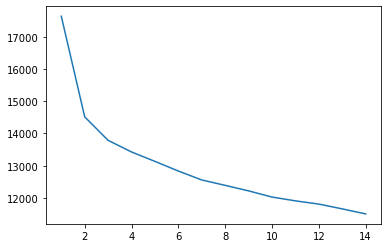

In [10]:
sns.lineplot(x=range(1,15),y=wss)

# Modeling

## Clustering with 3 Clusters

In [11]:
kmeans_model = KMeans(n_clusters=3,random_state=2410).fit(rawdata_std)

# Clustering Output Binding

In [12]:
kmeans_model.labels_

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1,
       1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 1,
       1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1,
       0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

# Combine Cluster info with original data

In [13]:
fullDf = pd.concat([rawdata,pd.Series(kmeans_model.labels_)],axis=1).rename(columns={0:"cluster"})
fullDf.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,1,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,...,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594,0
1,1,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,...,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397,0
2,1,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,...,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802,0
3,1,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,...,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210,1
4,1,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,...,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483,0


# Cluster Size

In [14]:
fullDf["cluster"].value_counts()

2    352
1    120
0     97
Name: cluster, dtype: int64

# Cluster Profiling

In [15]:
cluster_profile_df  =fullDf.groupby(["cluster"]).mean()
cluster_profile_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.000000,13.792530,19.253326,133.877320,1281.506186,0.094194,0.112552,0.102599,0.047281,0.178985,...,24.830103,29.072474,166.642268,1914.268041,0.140245,0.253572,0.469829,0.114722,0.312033,0.081737
1,0.925000,14.269312,18.812039,98.672583,707.808333,0.096275,0.100798,0.091479,0.043931,0.181446,...,17.768667,29.281917,118.691333,983.040833,0.148220,0.226198,0.462641,0.118526,0.335319,0.081634
2,0.011364,14.219266,19.035811,78.135142,464.172727,0.096221,0.106610,0.089884,0.050644,0.179753,...,13.398889,23.512727,87.001051,560.803693,0.124794,0.247348,0.152798,0.125656,0.268601,0.083141


# Bivariate Analysis
## plot diagnosis vs perimeter mean

<AxesSubplot:xlabel='diagnosis', ylabel='perimeter_mean'>

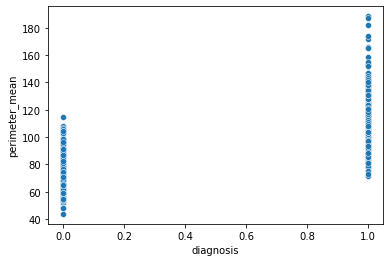

In [16]:
sns.scatterplot(y="perimeter_mean",x="diagnosis",data = fullDf )

# Concavity_mean vs perimeter_mean

<AxesSubplot:xlabel='concavity_mean', ylabel='perimeter_mean'>

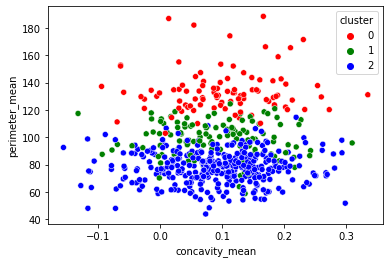

In [17]:
sns.scatterplot(x="concavity_mean",y="perimeter_mean",hue="cluster",palette=['red','green','blue'],data=fullDf)


# cluster validation using silhouette value

In [18]:
from sklearn.metrics import silhouette_samples,silhouette_score

# since we passed std data into model so we require to use same data sets into silhouette

In [19]:
fullDf2 = pd.concat([rawdata_std,pd.Series(kmeans_model.labels_)],axis=1).rename(columns={0:'cluster'}).copy()
fullDf2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,1.297676,0.013881,0.260882,1.269934,0.984375,0.016434,-0.327064,1.119732,1.134648,-1.120050,...,-1.359293,2.303601,2.001237,1.307686,-0.701018,2.109526,-0.024805,2.750622,1.025937,0
1,1.297676,1.260512,0.762178,1.685955,1.908708,-0.104871,-0.833161,-0.066185,-0.652919,1.265773,...,-0.369203,1.535126,1.890489,-0.375612,1.828835,-0.146749,-1.340454,-0.243890,-0.171962,0
2,1.297676,0.396013,-0.167180,1.566503,1.558884,-1.456150,-0.909003,0.489096,0.087740,1.594474,...,-0.023974,1.347475,1.456285,0.527407,-0.493896,0.854974,0.422629,1.152255,0.335611,0
3,1.297676,0.403088,1.891747,-0.592687,-0.764464,-0.316835,-0.355227,1.237301,-0.895001,-0.011010,...,0.133984,-0.249939,-0.550021,3.394275,-0.121482,1.989588,-0.177328,6.046041,0.195711,1
4,1.297676,-0.044249,-1.628685,1.776573,1.826229,-0.224964,-1.851124,-0.749924,-0.256612,-1.214339,...,-1.466770,1.338539,1.220724,0.220556,-1.077736,0.613179,0.063246,-0.868353,0.264407,0


In [20]:
fullDf2['silhouette_value'] = silhouette_samples(fullDf2, kmeans_model.labels_)
fullDf2.head() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster,silhouette_value
0,1.297676,0.013881,0.260882,1.269934,0.984375,0.016434,-0.327064,1.119732,1.134648,-1.120050,...,2.303601,2.001237,1.307686,-0.701018,2.109526,-0.024805,2.750622,1.025937,0,0.118101
1,1.297676,1.260512,0.762178,1.685955,1.908708,-0.104871,-0.833161,-0.066185,-0.652919,1.265773,...,1.535126,1.890489,-0.375612,1.828835,-0.146749,-1.340454,-0.243890,-0.171962,0,0.119074
2,1.297676,0.396013,-0.167180,1.566503,1.558884,-1.456150,-0.909003,0.489096,0.087740,1.594474,...,1.347475,1.456285,0.527407,-0.493896,0.854974,0.422629,1.152255,0.335611,0,0.086397
3,1.297676,0.403088,1.891747,-0.592687,-0.764464,-0.316835,-0.355227,1.237301,-0.895001,-0.011010,...,-0.249939,-0.550021,3.394275,-0.121482,1.989588,-0.177328,6.046041,0.195711,1,0.119570
4,1.297676,-0.044249,-1.628685,1.776573,1.826229,-0.224964,-1.851124,-0.749924,-0.256612,-1.214339,...,1.338539,1.220724,0.220556,-1.077736,0.613179,0.063246,-0.868353,0.264407,0,0.081951


In [21]:
fullDf2.groupby(['cluster'])['silhouette_value'].mean()


cluster
0    0.105901
1    0.066303
2    0.160892
Name: silhouette_value, dtype: float64

# Overall Silhoutte Score

In [22]:
silhouette_score(fullDf2,kmeans_model.labels_)

0.13160724442427374